In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## For Clustering:

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### We are assuming that the problem as Unsupervised Learning problem, so the lables are unknown here:

In [62]:
dataset = pd.read_csv('C:/Users/anshu/Downloads/bank-full.csv', sep=';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### We will check for the missing values:

In [63]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Get Dummies for Categorical Features:

#### First Check how many Categorical Variables are in the dataframe:

In [64]:
categorical_var = []
for i in dataset.columns:
    if (dataset[i].dtype=='O'):
        categorical_var.append(i)

In [65]:
categorical_var.remove('y') #its a dependent variable

In [66]:
categorical_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

#### Label Encoding for above Features:

In [67]:
dataset = pd.get_dummies(dataset, columns=categorical_var)

#### Data has been prepared for the Clustering and other Dimensionality Reduction Tasks:

In [68]:
dataset.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [69]:
bank_data = dataset.drop(columns=['y'], axis=1)
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### 1. K-Means Clustering

Implementing the Elbow Method to find optimum number of clusters based on WCSS - Within Cluster Sum of Square

In [70]:
from sklearn.cluster import KMeans

wcss=[] #Withing Cluster Sum of Square

#As mentioned during the lecture max number of cluster would be 10 (but again it depends)
#k-means++: selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, max_iter=300)
    kmeans.fit(bank_data)
    wcss.append(kmeans.inertia_)
    
#inertia_ is the formula used to segregate the data points into clusters

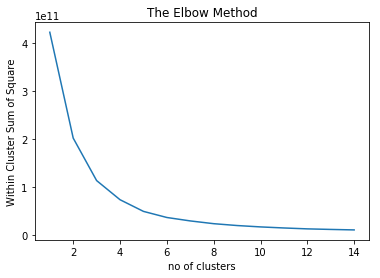

In [71]:
#Visualizing the ELBOW method to get the optimal value of K 

plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.show()

By observing the plot closely the last elbow that I am getting for my data is at 5 (So for this data K = 5)

In [72]:
## Run the model for k=5

kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=0, max_iter=300)
kmeans.fit(bank_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [106]:
kmean_clus = kmeans.labels_
kmean_center = kmeans.cluster_centers_

print(kmean_clus)
print(kmean_center)

## Add the column of clusters i.e. 'kmean_clus' to the original Dataset:

dataset['kmean_clus'] = kmean_clus

[3 0 0 ... 3 0 3]
[[-4.42480598e-01 -3.84735206e+02  8.50429188e-01  1.99461589e+00
  -3.81915118e+01  3.85223703e+02 -7.51140507e+01 -3.85790394e+02]
 [-8.49242736e-01 -8.36595900e+03  8.92933681e-01  1.99503776e+00
  -3.86806855e+01  8.36618674e+03 -7.86349621e+01 -8.36657614e+03]
 [-8.43586319e-01 -5.46379386e+04  1.82214645e+00  2.83445003e+00
  -1.98411502e+01  5.46387147e+04 -6.92078216e+01 -5.46389846e+04]
 [-6.77771098e-01 -3.11347957e+03  8.17280552e-01  1.89878152e+00
  -3.97654411e+01  3.11380365e+03 -7.95589993e+01 -3.11424330e+03]
 [-1.11632798e+00 -2.03778934e+04  1.00499608e+00  2.01901908e+00
  -3.20064172e+01  2.03783507e+04 -7.33376334e+01 -2.03786426e+04]]


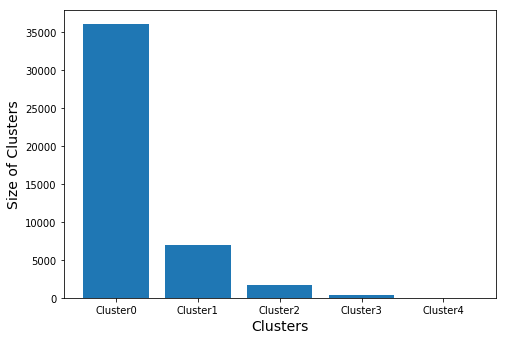

In [76]:
# Frequency distribution of k means clusters
dataset['kmean_clus'].value_counts()

# Cluster size plot for k means clusters
sizes=dataset['kmean_clus'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

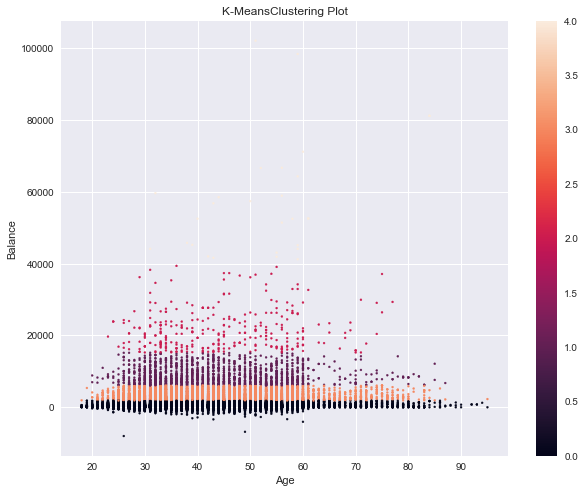

In [77]:
plot_set=pd.DataFrame()
plot_set['x']=dataset['age']
plot_set['y']=dataset['balance']
plot_set['label']=dataset['kmean_clus']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster

sns.set(rc={'figure.figsize':(10,8)})
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=4)
ax.set_title('K-MeansClustering Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Balance')
plt.colorbar(scatter)

### 2. Expectation Maximization Clustering:

Kind of similar to K-Means, but, instead of assigning examples to clusters to maximize the differences in means for continuous variables, the EM clustering algorithm computes probabilities of cluster memberships based on one or more probability distributions,

#### I will be using Gaussian Mixture Model for EM Clustering

In [92]:
gmm = GaussianMixture(n_components = 5).fit(bank_data)
em_clus = gmm.predict(bank_data)
gmm_centers=gmm.means_
## Add the column of clusters from GMM i.e. 'em_clus' to the original Dataset:

dataset['em_clus'] = em_clus

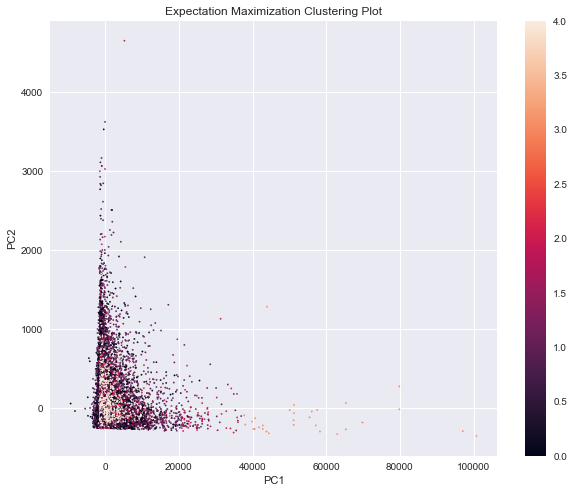

In [93]:
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['em_clus']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster from EM

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('Expectation Maximization Clustering Plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(scatter)

## Applying Dimensionality Reduction Techniques to the data:

#### A. Feature Selection: Applying Forward Selection:

In [80]:
#Preparing the dataframe that we will use for Forward Selection

f_selection_df = dataset
f_selection_df.drop(columns=['kmean_clus','em_clus'],axis=1,inplace=True)

In [81]:
# Train Test Split:

from sklearn.model_selection import train_test_split

x = f_selection_df.drop(columns=['y'],axis=1)
y = f_selection_df[['y']]

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

##### Implementing Forward Selection

In [82]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LogisticRegression() #part of feedback loop (Wrapping Process that we studied in Lecture)

# Build step forward feature selection
sfs1 = sfs(clf, k_features=20,forward=True, floating=False, verbose=0, scoring='accuracy', cv=5)

# Perform SFFS
sfs1 = sfs1.fit(xTrain, yTrain)
f_selection_features = list(sfs1.k_feature_names_)

# Fitting the kmeans model for the column subset i.e features of Forward Selection
kmeans.fit(bank_data[f_selection_features])
f_selection_clus = kmeans.labels_

## Add the column of clusters i.e. 'f_selection clus' to the original Dataset:

dataset['f_selection_clus'] = f_selection_clus

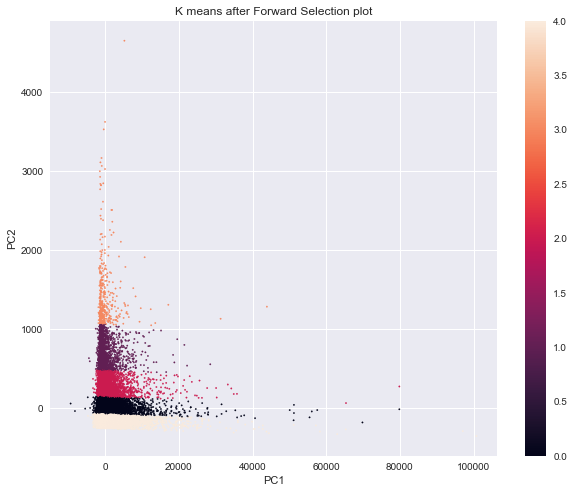

In [90]:
# kmeans plot - Kmeans followed by Forward Selection

sizes=dataset['f_selection_clus'].value_counts()
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['f_selection_clus']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster 0 to 3

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('K means after Forward Selection plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(scatter)

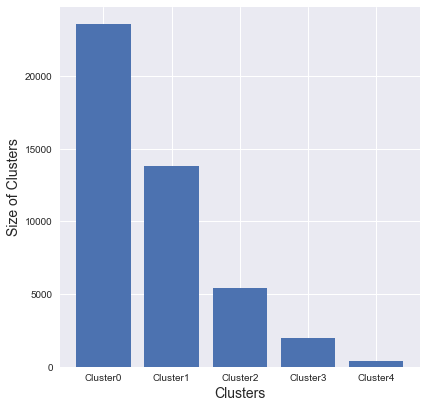

In [85]:
# K means cluster size analysis after Forward Selection:

sizes=dataset['f_selection_clus'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
sns.set(rc={'figure.figsize':(5,5)})

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

#### B. Principal Component Analysis

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principal_components = pca.fit_transform(bank_data)

explained_var = pca.explained_variance_ratio_
print('Explained Variance Ratio', explained_var)

Explained Variance Ratio [9.91814030e-01 7.09197095e-03 1.07280537e-03 1.19542646e-05
 7.36501778e-06]


In [88]:
# Fitting the kmeans model for the principal components

kmeans.fit(principal_components)
pca_clus = kmeans.labels_

## Add the column of clusters i.e. 'pca_cluster' to the original Dataset:

dataset['pca_clusters'] = pca_clus

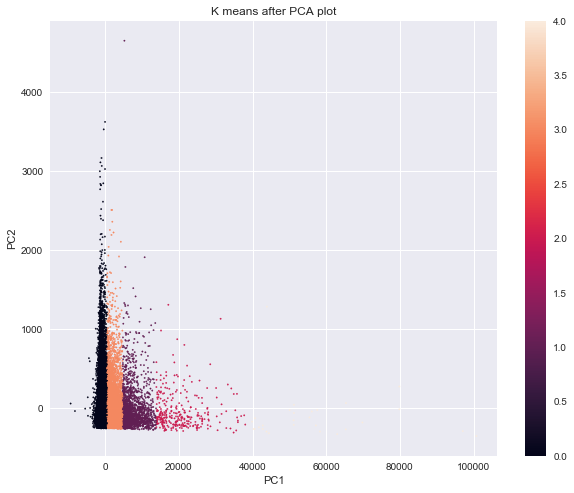

In [89]:
# kmeans plot - Kmeans followed by PCA
sizes=dataset['pca_clusters'].value_counts()
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['pca_clusters']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('K means after PCA plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(scatter)

#### C. Independent Component Analysis:

In [95]:
from sklearn.decomposition import FastICA

fast_ICA = FastICA(n_components=8, random_state=0)
transformed_bank_data = fast_ICA.fit_transform(bank_data)
transformed_bank_data.shape

(45211, 8)

In [96]:
# Fitting the kmeans model for the principal components

kmeans.fit(transformed_bank_data)
ica_clus = kmeans.labels_

## Add the column of clusters i.e. 'ica_cluster' to the original Dataset:

dataset['ica_clusters'] = ica_clus

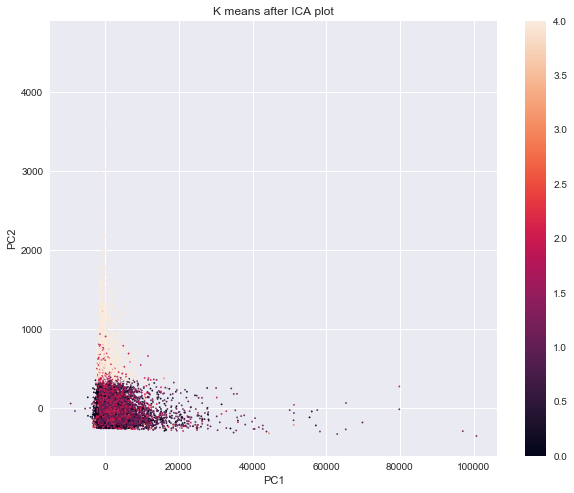

In [97]:
# kmeans plot - Kmeans followed by ICA

sizes=dataset['ica_clusters'].value_counts()
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['ica_clusters']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster 0 to 3

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('K means after ICA plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(scatter)

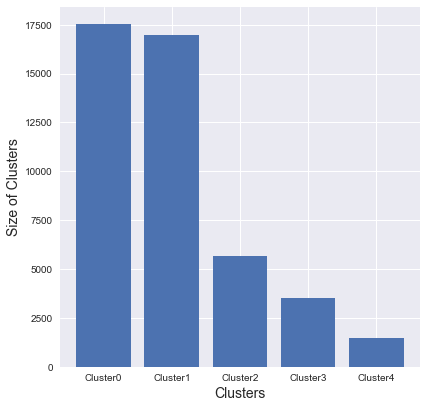

In [99]:
# K means cluster size analysis after ICA

sizes=dataset['ica_clusters'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

sns.set(rc={'figure.figsize':(5,5)})

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

#### D. Randomized Projection:

In [100]:
from sklearn import random_projection

rand_projection = random_projection.SparseRandomProjection(n_components = 8)
transformed_bnk_data = rand_projection.fit_transform(bank_data)
transformed_bnk_data.shape

(45211, 8)

In [101]:
# Fitting the kmeans model for the principal components

kmeans.fit(transformed_bnk_data)
rp_clusters=kmeans.labels_

## Add the column of clusters i.e. 'rand_proj_cluster' to the original Dataset:

dataset['rand_proj_cluster'] = rp_clusters

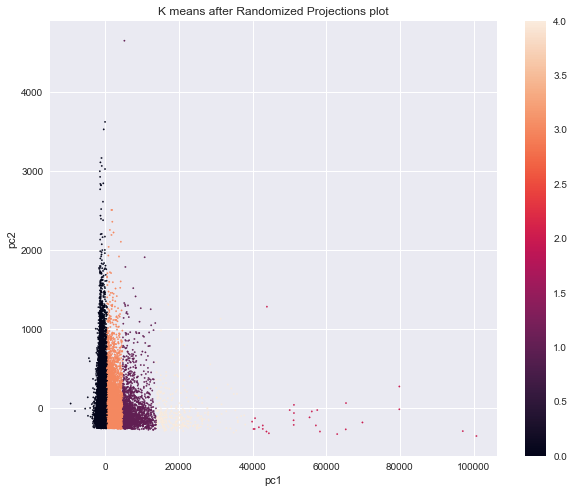

In [102]:
# kmeans plot - Kmeans followed by RCA (Randomized Projections)

sizes=dataset['rand_proj_cluster'].value_counts()
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=dataset['rand_proj_cluster']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster 0 to 3

sns.set(rc={'figure.figsize':(10,8)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('K means after Randomized Projections plot')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
plt.colorbar(scatter)

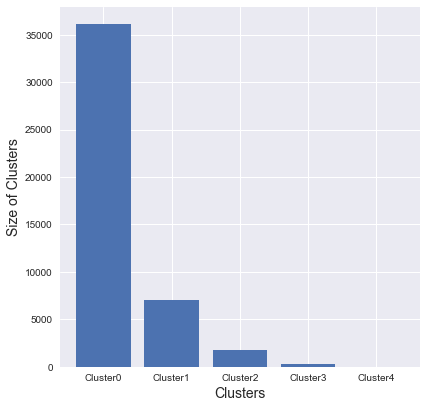

In [104]:
# K means cluster size analysis after RCA (Randomized Projections)

sizes=dataset['rand_proj_cluster'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

sns.set(rc={'figure.figsize':(5,5)})

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

##### Final overview of Dataset:

In [108]:
dataset.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,f_selection_clus,pca_clusters,em_clus,ica_clusters,rand_proj_cluster,kmean_clus
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,3,1,0,3,3
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,4,0,1,0,0,0
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,0,1,4,0,1,0,0,0
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,0,1,4,0,1,0,0,0
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,1,0,0,0


#### Lets take some insights on how values of clusters are spread:

In [112]:
df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3','PC4','PC5'])
finalDF = pd.concat([df, dataset[['y']]], axis = 1)

In [117]:
cleanup_nums = {"y":{"yes": 1, "no": 0}}

In [119]:
finalDF.replace(cleanup_nums, inplace=True)

In [121]:
finalDF.tail()

,PC1,PC2,PC3,PC4,PC5,y
45206,-535.951993,719.848086,-40.645317,10.312492,1.903655,1
45207,367.096314,197.184931,-41.181165,29.867693,1.753879,1
45208,4354.343024,860.720542,143.866194,30.125960,4.075318,1
45209,-693.811135,251.135112,-40.992475,16.248166,1.619288,0
45210,1608.929565,99.772130,147.795286,-4.088363,2.284695,0


### Applying Neural Network on Principal Components and Different Cluster Outputs:

In [122]:
# Train Test Split:
x = finalDF.drop(columns=['y'],axis=1)
y = finalDF[['y']]
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [123]:
import keras
import tensorflow as tf

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import keras.metrics
from keras import optimizers

model = Sequential()
model.add(Dense(2, input_dim = 5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.fit(xTrain,yTrain,epochs=100,verbose=1)

Using TensorFlow backend.


Epoch 1/100
31647/31647 [==============================] - 1s 26us/step - loss: 1.8865 - acc: 0.8833
Epoch 2/100
31647/31647 [==============================] - 1s 20us/step - loss: 1.8826 - acc: 0.8833
Epoch 3/100
31647/31647 [==============================] - 1s 20us/step - loss: 1.8800 - acc: 0.8833
Epoch 4/100
31647/31647 [==============================] - 1s 20us/step - loss: 1.8784 - acc: 0.8833
Epoch 5/100
31647/31647 [==============================] - 1s 20us/step - loss: 1.8775 - acc: 0.8833
Epoch 6/100
31647/31647 [==============================] - 1s 20us/step - loss: 1.8771 - acc: 0.8833
Epoch 7/100
31647/31647 [==============================] - 1s 22us/step - loss: 1.8769 - acc: 0.8833
Epoch 8/100
31647/31647 [==============================] - 1s 21us/step - loss: 1.8767 - acc: 0.8833
Epoch 9/100
31647/31647 [==============================] - 1s 20us/step - loss: 1.8764 - acc: 0.8833
Epoch 10/100
31647/31647 [==============================] - 1s 20us/step - loss: 1.8764 - a

31647/31647 [==============================] - 1s 20us/step - loss: 0.2867 - acc: 0.8884
Epoch 82/100
31647/31647 [==============================] - 1s 20us/step - loss: 0.2869 - acc: 0.8877
Epoch 83/100
31647/31647 [==============================] - 1s 21us/step - loss: 0.2865 - acc: 0.8878
Epoch 84/100
31647/31647 [==============================] - 1s 21us/step - loss: 0.2864 - acc: 0.8880
Epoch 85/100
31647/31647 [==============================] - 1s 21us/step - loss: 0.2859 - acc: 0.8892
Epoch 86/100
31647/31647 [==============================] - 1s 22us/step - loss: 0.2866 - acc: 0.8883
Epoch 87/100
31647/31647 [==============================] - 1s 21us/step - loss: 0.2883 - acc: 0.8881
Epoch 88/100
31647/31647 [==============================] - 1s 21us/step - loss: 0.2863 - acc: 0.8888
Epoch 89/100
31647/31647 [==============================] - 1s 21us/step - loss: 0.2866 - acc: 0.8881
Epoch 90/100
31647/31647 [==============================] - 1s 20us/step - loss: 0.2863 - acc: 

In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test_predict = model.predict(xTest)
y_predict = np.where(y_test_predict>= 0.5, 1, 0)

print('Classification Report:')
print(classification_report(yTest,y_predict))
print('Confusion Matrix:')
print(confusion_matrix(yTest,y_predict))

Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.99      0.94     11969
          1       0.52      0.05      0.10      1595

avg / total       0.84      0.88      0.84     13564

Confusion Matrix:
[[11892    77]
 [ 1511    84]]


### Explained Variance Plot after PCA:

In [126]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.91814030e-01, 7.09197095e-03, 1.07280537e-03, 1.19542646e-05,
       7.36501778e-06])

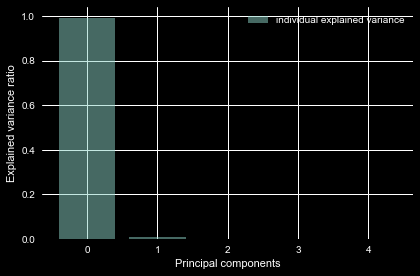

In [127]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### Experimenting Neural Network with various cluster outputs and Class Label:

In [128]:
df2 = dataset[['kmean_clus', 'em_clus', 'f_selection_clus','pca_clusters','ica_clusters', 'rand_proj_cluster', 'y']]

In [130]:
clean_nums = {"y":{"yes": 1, "no": 0}}

In [131]:
df2.replace(clean_nums, inplace=True)

In [133]:
df2.tail()

,kmean_clus,em_clus,f_selection_clus,pca_clusters,ica_clusters,rand_proj_cluster,y
45206,0,1,1,0,4,0,1
45207,0,1,2,0,1,0,1
45208,3,4,1,3,4,3,1
45209,0,1,2,0,1,0,0
45210,3,0,0,3,2,3,0


#### Using Group by to get better insights on clusters

In [134]:
df2.groupby(['kmean_clus','y'])['y'].count()

kmean_clus  y
0           0    32332
            1     3796
1           0     1462
            1      268
2           0       23
            1        5
3           0     5828
            1     1183
4           0      277
            1       37
Name: y, dtype: int64

### Plotting comparative plots of various clusters, based on o/p labels:

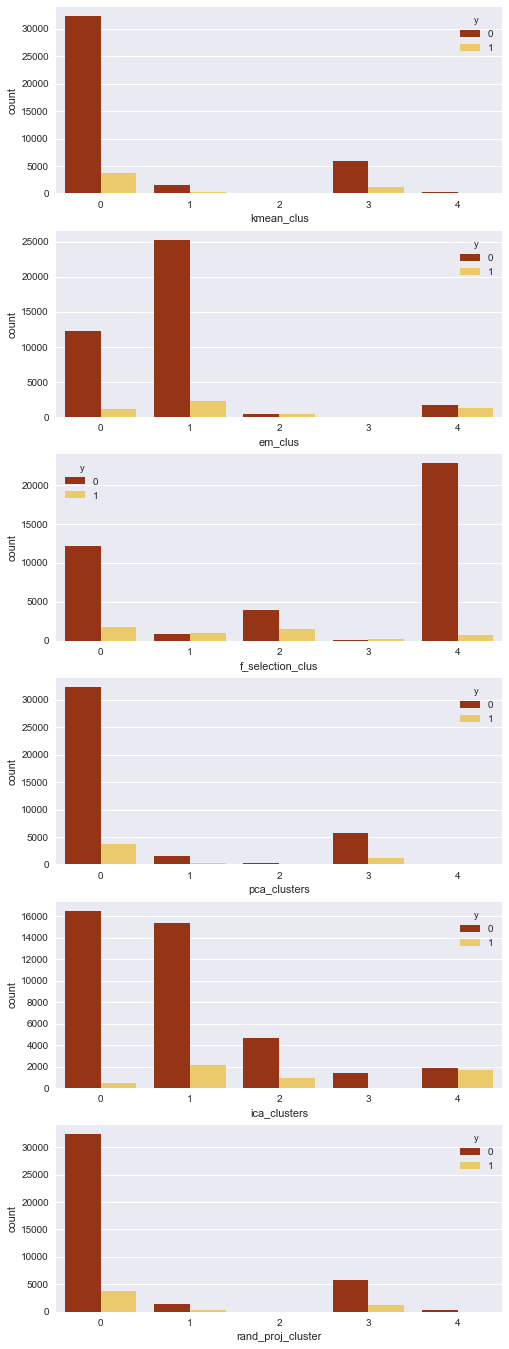

In [135]:
sns.set(rc={'figure.figsize':(8,24)})
fig, (ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(6)
sns.countplot(data = df2, x = 'kmean_clus', hue = 'y', palette = 'afmhot',ax=ax1)
sns.countplot(data = df2, x = 'em_clus', hue = 'y', palette = 'afmhot',ax=ax2)
sns.countplot(data = df2, x = 'f_selection_clus', hue = 'y', palette = 'afmhot',ax=ax3)
sns.countplot(data = df2, x = 'pca_clusters', hue = 'y', palette = 'afmhot',ax=ax4)
sns.countplot(data = df2, x = 'ica_clusters', hue = 'y', palette = 'afmhot',ax=ax5)
sns.countplot(data = df2, x = 'rand_proj_cluster', hue = 'y', palette = 'afmhot',ax=ax6)

### Applying Neural net on Cluster outputs and Class Labels:

In [136]:
# Train Test Split:
x = df2.drop(columns=['y'],axis=1)
y = df2[['y']]
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [137]:
model = Sequential()
model.add(Dense(4, input_dim = 6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.fit(xTrain,yTrain,epochs=100,batch_size=50,verbose=1)

Epoch 1/100
31647/31647 [==============================] - 1s 19us/step - loss: 0.6157 - acc: 0.8264
Epoch 2/100
31647/31647 [==============================] - 0s 14us/step - loss: 0.4221 - acc: 0.8857
Epoch 3/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2830 - acc: 0.8871
Epoch 4/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2734 - acc: 0.8878
Epoch 5/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2719 - acc: 0.8878
Epoch 6/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2713 - acc: 0.8869
Epoch 7/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2712 - acc: 0.8870
Epoch 8/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2705 - acc: 0.8872
Epoch 9/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2702 - acc: 0.8871
Epoch 10/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2699 - a

31647/31647 [==============================] - 0s 14us/step - loss: 0.2655 - acc: 0.8868
Epoch 82/100
31647/31647 [==============================] - 0s 14us/step - loss: 0.2655 - acc: 0.8877
Epoch 83/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2656 - acc: 0.8859
Epoch 84/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2655 - acc: 0.8860
Epoch 85/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2656 - acc: 0.8869
Epoch 86/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2656 - acc: 0.8863
Epoch 87/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2655 - acc: 0.8871
Epoch 88/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2654 - acc: 0.8868
Epoch 89/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2653 - acc: 0.8854
Epoch 90/100
31647/31647 [==============================] - 0s 13us/step - loss: 0.2656 - acc: 

In [138]:
from sklearn.metrics import classification_report
y_test_pred = model.predict(xTest)
y_pred = np.where(y_test_pred>= 0.5, 1, 0)

print('Classification Report:')
print(classification_report(yTest,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(yTest,y_pred))

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.95      0.93     11969
          1       0.50      0.42      0.46      1595

avg / total       0.87      0.88      0.88     13564

Confusion Matrix:
[[11317   652]
 [  930   665]]
